In [1]:
import pandas as pd

df = pd.read_csv(
    "../data/HHS_Unaccompanied_Alien_Children_Program.csv"
)

# Clean columns
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Children in HHS Care"] = (
    df["Children in HHS Care"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

df = df.dropna(subset=["Date"])
df = df.sort_values("Date").set_index("Date")

# Derived metric
df["Total System Load"] = (
    df["Children in CBP custody"] +
    df["Children in HHS Care"]
)

df.head()


,Children apprehended and placed in CBP custody*,Children in CBP custody,Children transferred out of CBP custody,Children in HHS Care,Children discharged from HHS Care,Total System Load
Date,,,,,,
2023-01-12,33.0,53.0,34.0,6566.0,436.0,6619.0
2023-01-22,32.0,49.0,39.0,7122.0,227.0,7171.0
2023-01-23,32.0,50.0,39.0,7280.0,181.0,7330.0
2023-01-24,47.0,42.0,47.0,7433.0,175.0,7475.0
2023-01-25,20.0,22.0,41.0,7538.0,180.0,7560.0


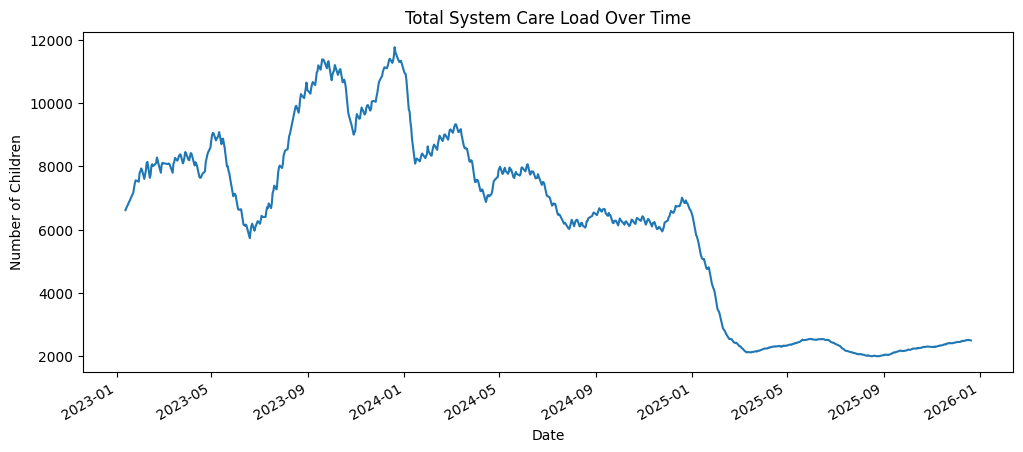

In [4]:
import matplotlib.pyplot as plt

df["Total System Load"].plot(figsize=(12,5))
plt.title("Total System Care Load Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Children")
plt.show()
